In [2]:
from utils.colab import *
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import cv2
import matplotlib.pyplot as plt
from torchinfo import summary
from utils.pretools import load_model as load_model_solider


2023-11-17 12:16:39.295927: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 12:16:39.456505: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 12:16:39.456524: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 12:16:39.457061: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 12:16:39.530298: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

# 0.- Mode Summary

In [ ]:
model = load_model_solider(weight='./model/swin_base_market.pth',semantic_weight=0.2)
summary(model=model,
        input_size=(1,3,384,128),
        # col_names=['input_size','output_size','num_params','trainable'],
        col_width=20,
        row_settings=['var_names']
        )

# 1.- Faces

In [ ]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace",]
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe','yolov8','yunet',]

test = [
'./images_subframev2/41',
]
result = face_id_details(folder_path=test,model=models[2],backend=backends[4])# plot_images_with_rectangles(images_path, images_names_2, facial_area, confidence)

In [ ]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace",]
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe','yolov8','yunet',]

test = [
'./images_subframev2/41',
]
# features , images_names = solider_result(folder_path=test, weight='./model/swin_base_market.pth')
features_1 , images_names_1 = face_id_results(folder_path=test,model=models[2],backend=backends[0])
# features_2 , images_names_2 = face_id_results(folder_path=test,model=models[2],backend=backends[3])
# features_3 , images_names_3 = face_id_results(folder_path=test,model=models[2],backend=backends[4])
# features_2 , images_names_2 = face_id_results(folder_path=test,model=models[2],backend=backends[5])
# features_2 , images_names_2 = face_id_results(folder_path=test,model=models[2],backend=backends[6])
# features_2 , images_names_2 = face_id_results(folder_path=test,model=models[2],backend=backends[7])
# features_3 , images_names_3 = alignedreid_result(folder_path=test, weight='./model/swin_base_market.pth')

plot_mds(features_array=features_1, image_names=images_names_1,simpleLegend=True, title='opencv')
# plot_mds(features_array=features_2, image_names=images_names_2,simpleLegend=True, title='solider_result')
# plot_mds(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='transreid_result')

# 2.- Heatmap

In [ ]:
test = [
    # './images_subframev2/2',
    './images_subframev2/48',
    # './images_subframev2/77',
    ]
heatmap_solider(test,weight='./model/swin_base_market.pth',semantic_weight=0.2,figsize=(15,15))
heatmap_transreid(test,pretrain_path="TransReID/model/jx_vit_base_p16_224-80ecf9dd.pth",weight="TransReID/model/vit_transreid_market.pth")
heatmap_alignreid(test,weight="AlignedReID/Cuhk03_Resnet50_Alignedreid/checkpoint_ep300.pth.tar")

# 3.- Plot Solider,TransReId, AlignedReId

In [12]:
import numpy as np
from sklearn.metrics import silhouette_score, euclidean_distances
from sklearn.manifold import MDS
from scipy import stats
import re
from scipy.stats import f_oneway


def evaluate_model(features, image_names):
    """
    Evaluate the model based on the features and image names provided.
    
    Args:
    features (np.array): The array of features with shape (num_images, feat_vector).
    image_names (list): The list of image names with labels.
    
    Returns:
    dict: A dictionary with the calculated metrics and a plot of MDS.
    """
    
    # Extract the IDs from image names using regex
    ids = [int(re.search(r'img_(\d+)_', name).group(1)) for name in image_names]
    
    # Calculate pairwise Euclidean distances
    pairwise_dist = euclidean_distances(features)
    
    # Compute intra-class and inter-class distances
    intra_class_dists = []
    inter_class_dists = []
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if ids[i] == ids[j]:
                intra_class_dists.append(pairwise_dist[i, j])
            else:
                inter_class_dists.append(pairwise_dist[i, j])
    
    # Calculate the average intra-class and inter-class distance
    avg_intra_class_dist = np.mean(intra_class_dists)
    avg_inter_class_dist = np.mean(inter_class_dists)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(features, ids)

    
    # Return the computed metrics
    return {
        'avg_intra_class_dist': avg_intra_class_dist,
        'avg_inter_class_dist': avg_inter_class_dist,
        'silhouette_score': silhouette_avg
    }



using Transformer_type: swin_base_patch4_window7_224 as a backbone
===========building transformer===========
Loading pretrained model from ./log/market1501/swin_base20/transformer_100.pth


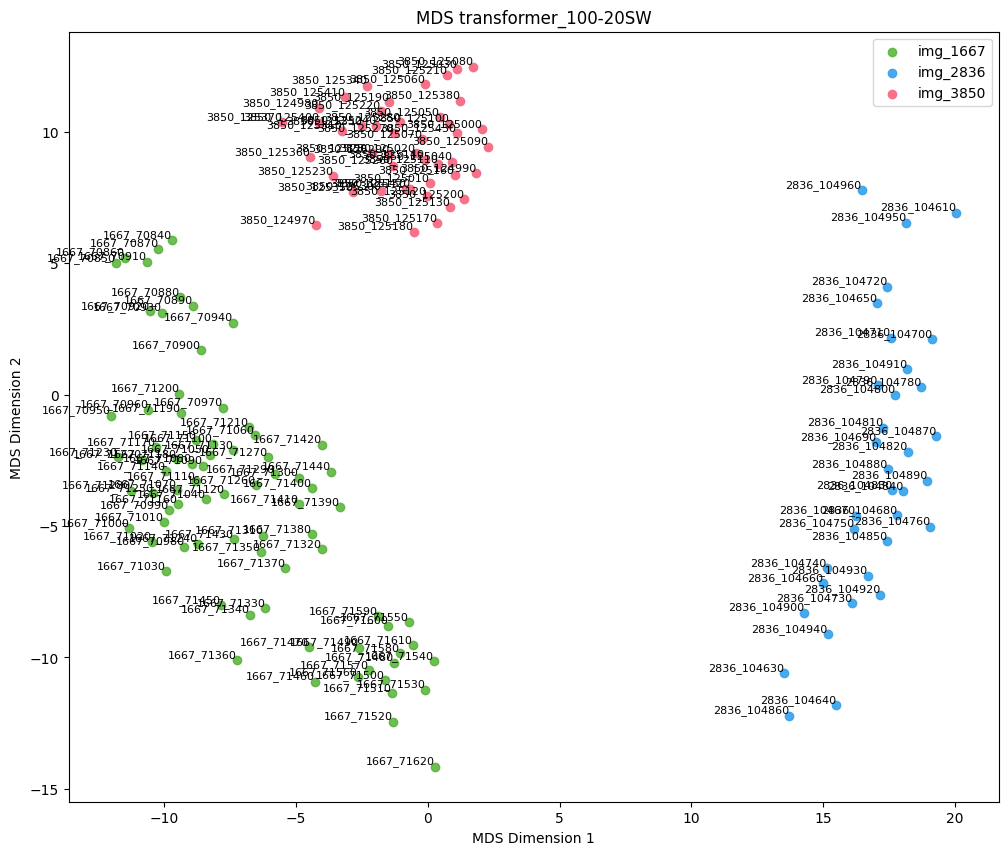

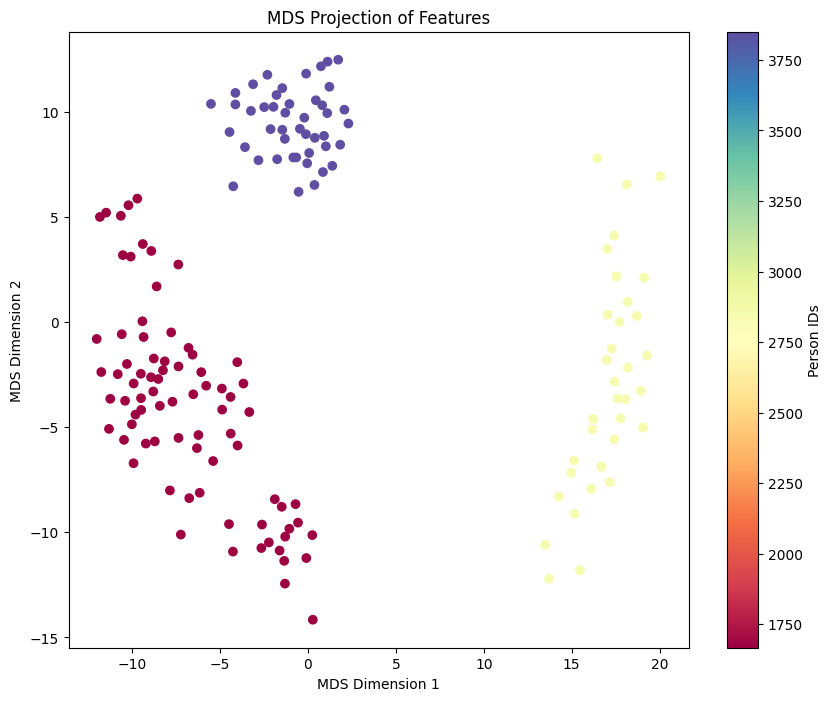

{'avg_intra_class_dist': 9.578018, 'avg_inter_class_dist': 20.268969, 'silhouette_score': 0.45331892, 'anova_p_value': 6.057553274414066e-300}


In [13]:
test = [
    '/home/diego/Downloads/DataAdicionalTest/1667',
    '/home/diego/Downloads/DataAdicionalTest/2836',
    '/home/diego/Downloads/DataAdicionalTest/3850',
    ]

features , images_names = solider_result(folder_path=test, weight='./log/market1501/swin_base20/transformer_100.pth')
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='transformer_100-20SW')
result = evaluate_model(features=features,image_names=images_names)
print(result)

# features , images_names = solider_result(folder_path=test, weight='/home/diego/Documents/Weights/swin_base_market.pth')
# plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='swin_base_market.pth')

# features , images_names = solider_result(folder_path=test, weight='./log/market1501/swin_base40/transformer_100.pth')
# plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='transformer_100-40SW')

# features , images_names = solider_result(folder_path=test, weight='./log/market1501/swin_base60/transformer_100.pth')
# plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='transformer_100-60SW')

# features , images_names = solider_result(folder_path=test, weight='./log/market1501/swin_base80/transformer_100.pth')
# plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='transformer_100-80SW')

# features , images_names = solider_result(folder_path=test, weight='./model/swin_base_market.pth')
# plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='swin_base_market')



In [ ]:
test = [
    './images_subframev2/4',
    './images_subframev2/90',
    './images_subframev2/3',
    ]

features , images_names = solider_result(folder_path=test, weight='./model/swin_tiny_market.pth')
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='swin_tiny_market')

features , images_names = solider_result(folder_path=test, weight='./RESULT_TRAINING_VAST_AI/transformer_120_tiny_vast_ai.pth')
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='transformer_120_tiny_vast_ai')

features , features = solider_result(folder_path=test, weight='./model/swin_base_market.pth')
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='swin_base_market')

features , features = alignedreid_result(folder_path=test, weight='/home/diego/Documents/AlignedReID/log/best_model.pth.tar')
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='best_modelAligned')

In [ ]:
features_from_csv = pd.read_csv('solider.csv').sort_values(by='folder')
A=16
B=89
images_names, features = features_from_csv[(features_from_csv.folder == A) | (features_from_csv.folder == B)].iloc[:, 1].values, features_from_csv[(features_from_csv.folder == A) | (features_from_csv.folder == B)].iloc[:, 2:].values
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',scaler=True)
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',scaler=False)
# plot_mds_dbscan(features_array=features, image_names=images_names,plot=True, title='DB',eps=9,min_samples_ratio=0.15,min_include=3, scaler=False)
plot_mds_gmm(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',scaler=False,n_clusters=3)
plot_mds_kmeans(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',scaler=False,n_clusters=3)

In [ ]:
features_from_csv = pd.read_csv('solider.csv').sort_values(by='folder')
A = 1
B = 90

images_names, features = features_from_csv[(features_from_csv.folder == A) | (features_from_csv.folder == B)].iloc[:, 1].values, features_from_csv[(features_from_csv.folder == A) | (features_from_csv.folder == B)].iloc[:, 2:].values
# scaler = StandardScaler().fit(features)
# features = scaler.transform(features)
plot_mds_dbscan(features_array=features, image_names=images_names,plot=True, title='DB',eps=9,min_samples_ratio=0.15,min_include=3)
# plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market')

In [ ]:
folderA = total_folder_to_traverse[i] 
folderB = total_folder_to_traverse[j]
valuesA = features_from_csv[features_from_csv.folder == folderA]
valuesB = features_from_csv[features_from_csv.folder == folderB]
totalValues = pd.concat([valuesA,valuesB],ignore_index=True)
images_names , features = totalValues.iloc[:, 1], totalValues.iloc[:, 2:].values
match, msg = plot_mds_dbscan(features_array=features, image_names=images_names,simpleLegend=True, title='DB',eps=9,min_samples=14)

In [ ]:
count_folders_items = features_from_csv.groupby('folder').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
filter = count_folders_items[count_folders_items.Count > 10]
total_folder_to_traverse =filter['folder'].values
total_folder_to_traverse[0]

In [ ]:
for i in range(len(total_folder_to_traverse)):
    for j in range(i + 1, len(total_folder_to_traverse)):
        # Perform your calculation or operation here
        result = total_folder_to_traverse[i] * total_folder_to_traverse[j]
        
        print(f"Calculation between {total_folder_to_traverse[i]} and {total_folder_to_traverse[j]}: {result}")

In [ ]:

images_names, features = features_from_csv[features_from_csv.folder == total_folder_to_traverse[0]].iloc[:, 1], features_from_csv[features_from_csv.folder == total_folder_to_traverse[0]].iloc[:, 2:].values

In [ ]:
test = [
        # './images_subframev2/90',
        # './images_subframev2/10',
        # './images_subframev2/44',
        # './images_subframev2/72',
        # './images_subframev2/4',
        './images_subframev2/2',
        './images_subframev2/90',
        # './images_subframev2/2',
        # './images_testsss',
        ]
features , images_names = solider_result(folder_path=test, weight='./model/swin_base_market.pth')

In [ ]:
features_from_csv = pd.read_csv('solider_2_90.csv').sort_values(by='folder')
images_names_csv, features_csv = features_from_csv.iloc[:, 1], features_from_csv.iloc[:, 2:].values

In [ ]:
plot_svd(features_array=features, image_names=images_names,simpleLegend=True, title='CALC')
plot_svd(features_array=features_csv, image_names=images_names_csv,simpleLegend=True, title='EXCEL')

In [ ]:
test = [
        # './images_subframev2/90',
        # './images_subframev2/10',
        # './images_subframev2/44',
        # './images_subframev2/72',
        # './images_subframev2/4',
        # './images_subframev2/77',
        # './images_subframev2/130',
        './images_subframev2/1',
        './images_subframev2/2',
        # './images_testsss',
        ]
features_2 , images_names_2 = solider_result(folder_path=test, weight='./model/swin_base_market.pth')

In [ ]:
test = [
        './images_subframev2/90',
        # './images_subframev2/10',
        # './images_subframev2/44',
        # './images_subframev2/72',
        # './images_subframev2/4',
        # './images_subframev2/77',
        # './images_subframev2/130',
        # './images_subframev2/1',
        './images_subframev2/2',
        # './images_testsss',
        ]
features_3 , images_names_3 = solider_result(folder_path=test, weight='./model/swin_base_market.pth')

In [ ]:
plot_mds_dbscan(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='TEST swin_base_market',eps=9,min_samples=14)
plot_mds_dbscan(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='TEST swin_base_market',eps=9,min_samples=14)
plot_mds_dbscan(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='TEST swin_base_market',eps=9,min_samples=14)
plot_mds_dbscan(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='TEST swin_base_market',eps=9,min_samples=14)
plot_mds_dbscan(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='TEST swin_base_market',eps=9,min_samples=14)
plot_mds_dbscan(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='TEST swin_base_market',eps=9,min_samples=14)


In [ ]:
plot_mds(features_array=features_2, image_names=images_names_2,simpleLegend=True, title='TEST swin_base_market')

In [ ]:
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market')
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=5)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=10)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=15)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=20)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=25)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=30)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=35)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=40)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=45)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=50)

# 4.- Plot Solider Benchmark

In [ ]:
test = [
    '/home/diego/Downloads/DataAdicionalTest/10433',
    '/home/diego/Downloads/DataAdicionalTest/10847',
    '/home/diego/Downloads/DataAdicionalTest/11577',
    '/home/diego/Downloads/DataAdicionalTest/12218',
    # '/home/diego/Downloads/DataAdicionalTest/12556',
    # '/home/diego/Downloads/DataAdicionalTest/13216',
    # '/home/diego/Downloads/DataAdicionalTest/13622',
    ]

# features , images_names = solider_result(folder_path=test, weight='/home/diego/Documents/solider-reid/log/market1501/swin_base/transformer_100.pth')
# plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='transformer_100.pth')

# features , images_names = solider_result(folder_path=test, weight='/home/diego/Documents/solider-reid/log/market1501/swin_base/transformer_110.pth')
# plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='transformer_110.pth')

# features , images_names = solider_result(folder_path=test, weight='/home/diego/Documents/solider-reid/log/market1501/swin_base/transformer_140.pth')
# plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='transformer_140.pth')

# features , images_names = solider_result(folder_path=test, weight='/home/diego/Documents/solider-reid/model/swin_base_market.pth')
# plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='swin_base_market.pth')


features , images_names = alignedreid_result(folder_path=test, weight='/home/diego/Documents/AlignedReID/log/best_model.pth.tar')
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='best_modelAligned')

features , images_names = alignedreid_result(folder_path=test, weight='/home/diego/Documents/AlignedReID/log2/best_model.pth.tar')
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='best_modelAligned2')